In [1]:
#pip install -U git+https://github.com/openai/CLIP.git

In [2]:
import torch
import clip #from openai (https://github.com/openai/CLIP.git)
from PIL import Image
from diffusers import StableDiffusionPipeline

In [3]:
#loading stable diffusion model
sd_pipeline = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16).to("cuda")

text = "people watching a conference"
images = sd_pipeline(text, num_images_per_prompt=2, output_type="pil").images

vae\diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

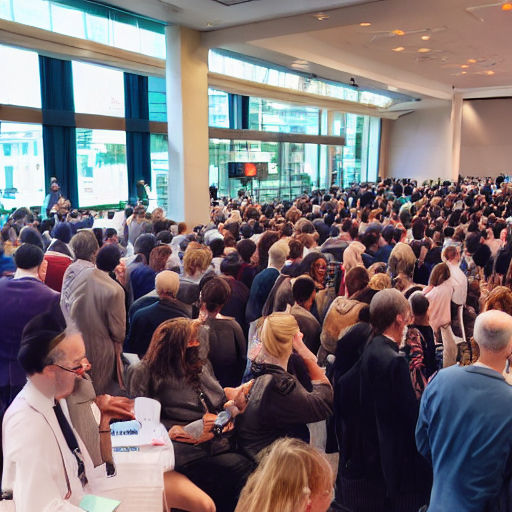

In [5]:
images[1]

In [12]:
# text = "tiger in a jungle"
# text = "audience watching a conference"

In [13]:
device = "cuda"
model, preprocess = clip.load('ViT-B/32') # loading openai clip pre-trained model
model = model.to(device)
image_input = preprocess(images[0]).unsqueeze(0).to(device)
text_input = clip.tokenize([text]).to(device)

In [14]:
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_input)

clip_score = torch.matmul(image_features, text_features.T)
print(clip_score.item()) # more the clip score, better the model is

25.890625
